### Bain path

The Bain path was calculated using a two-atom BCC unit cell by varying c/a ratio from $1.0 (BCC)$ to $\sqrt2 (FCC)$ and the volume of cell was kept.


In [1]:
from pyiron import Project
import numpy as np
import matplotlib.pylab as plt
import ase.units

In [2]:
potential =  'FeH-NNIP'

In [3]:
pr = Project('Bain_path')

In [4]:
bulk = pr.create.structure.bulk('Fe', crystalstructure='bcc', cubic=True)
job = pr.create.job.Lammps('minimise', delete_existing_job=True)
job.structure = bulk
job.potential = potential
job.calc_minimize(pressure=0.0)
job.run(delete_existing_job=True)
structure = job.get_structure(-1)
cell = structure.get_cell()
E = job.output.energy_tot[-1]/len(structure)
E

The job minimise was saved and received the ID: 10185


-8.2415477862903

In [5]:
ratio = np.arange(0.8, 2.0, 0.05)
deltaE = []

In [6]:
for x in ratio:
    job = pr.create.job.Lammps('energy', delete_existing_job=True)
    bulk = structure.copy()
    cell_change = cell.copy()
    matrix = np.zeros((3, 3))
    np.fill_diagonal(matrix, [1/np.power(x, 1/3), 1/np.power(x, 1/3), np.power(x, 1/3)**2])
    bulk.set_cell(cell_change*matrix, scale_atoms=True)
    job.structure = bulk
    job.potential = potential
    job.calc_minimize()
    job.run(delete_existing_job=True)
    print('current volume: ',job.get_structure(-1).get_volume())
    e = job.output.energy_tot[-1]/len(bulk)
    deltaE.append(e-E)

The job energy was saved and received the ID: 10186
current volume:  22.663461928943267
The job energy was saved and received the ID: 10186
current volume:  22.663461929070483
The job energy was saved and received the ID: 10186
current volume:  22.66346192833458
The job energy was saved and received the ID: 10186
current volume:  22.663461929106987
The job energy was saved and received the ID: 10186
current volume:  22.6634619292773
The job energy was saved and received the ID: 10186
current volume:  22.66346192891555
The job energy was saved and received the ID: 10186
current volume:  22.66346192881932
The job energy was saved and received the ID: 10186
current volume:  22.66346192901573
The job energy was saved and received the ID: 10186
current volume:  22.663461928729113
The job energy was saved and received the ID: 10186
current volume:  22.663461929415085
The job energy was saved and received the ID: 10186
current volume:  22.663461929195424
The job energy was saved and received 

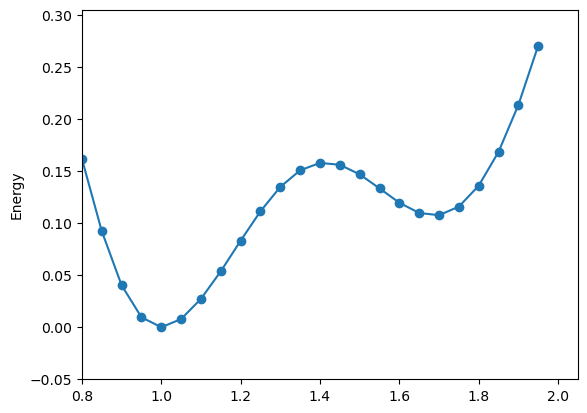

In [7]:
plt.plot(ratio, deltaE, marker='o')
plt.ylabel('Energy')
# plt.legend()
plt.xlim(0.8, 2.05)
plt.ylim(-0.05, 0.305)
plt.show()

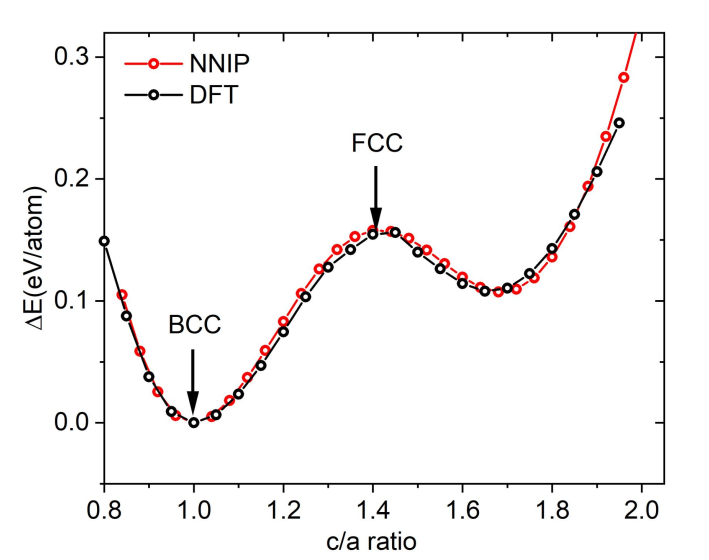